<a href="https://colab.research.google.com/github/MohitSharma6902/dog_vs_cat_image_classifer/blob/main/Cat_VS_Dog_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:08<00:00, 229MB/s]
100% 1.06G/1.06G [00:08<00:00, 140MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize (0-1)
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 58s 90ms/step - loss: 0.6541 - accuracy: 0.6102 - val_loss: 0.5712 - val_accuracy: 0.7016
Epoch 2/10
625/625 [==============================] - 58s 91ms/step - loss: 0.4945 - accuracy: 0.7570 - val_loss: 0.5033 - val_accuracy: 0.7654
Epoch 3/10
625/625 [==============================] - 54s 86ms/step - loss: 0.3697 - accuracy: 0.8319 - val_loss: 0.5787 - val_accuracy: 0.7702
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2322 - accuracy: 0.9006 - val_loss: 0.7917 - val_accuracy: 0.7736
Epoch 5/10
625/625 [==============================] - 52s 83ms/step - loss: 0.1225 - accuracy: 0.9531 - val_loss: 1.0223 - val_accuracy: 0.7772
Epoch 6/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0776 - accuracy: 0.9729 - val_loss: 1.3080 - val_accuracy: 0.7644
Epoch 7/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0580 - accuracy: 0.9812 - val_loss: 1.2526 - val_accuracy:

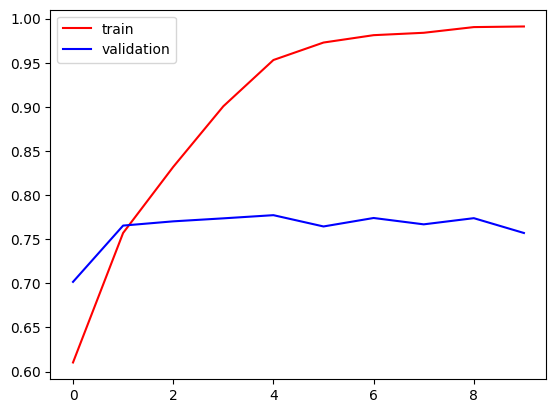

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

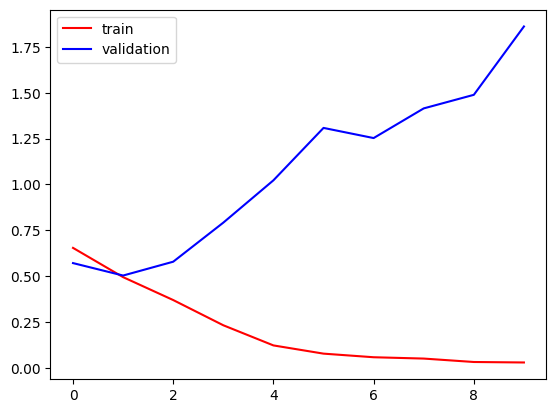

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

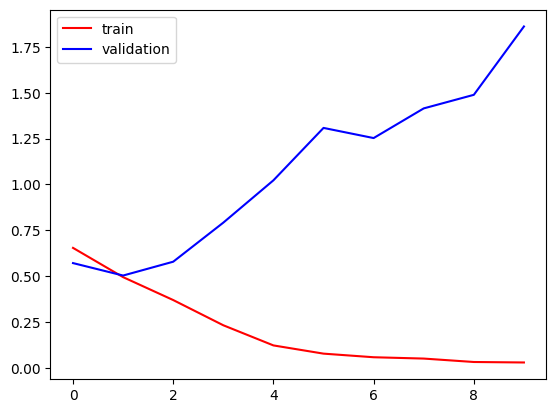

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Dropout
# Batch Norm
# Reduce complexity

In [ ]:
# create CNN model to Reduce OverTraining

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 110ms/step - loss: 1.4430 - accuracy: 0.5924 - val_loss: 0.6525 - val_accuracy: 0.6744
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5790 - accuracy: 0.7000 - val_loss: 0.6436 - val_accuracy: 0.6442
Epoch 3/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4900 - accuracy: 0.7670 - val_loss: 0.4957 - val_accuracy: 0.7658
Epoch 4/10
625/625 [==============================] - 63s 101ms/step - loss: 0.4675 - accuracy: 0.7830 - val_loss: 0.6180 - val_accuracy: 0.7556
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3900 - accuracy: 0.8256 - val_loss: 0.7354 - val_accuracy: 0.6808
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.3240 - accuracy: 0.8597 - val_loss: 0.5625 - val_accuracy: 0.7368
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2503 - accuracy: 0.8964 - val_loss: 0.5874 - val_ac

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/cat.jpeg')
test_img = cv2.cvtColor(test_img,cv2.COLOR_BGR2RGB)

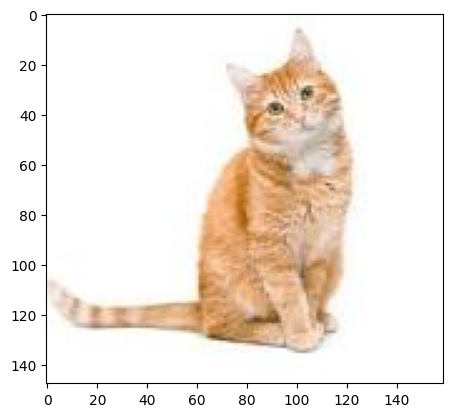

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test_img)

In [ ]:
test_img.shape

(148, 159, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 345ms/step


array([[0.]], dtype=float32)